In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
dataO = pd.read_csv('WESAD_Undersample.csv')

In [3]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,-52.0,-17.0,33.0,23.01,2.453717,34.43,0.0
1,-33.0,-7.0,-56.0,-23.26,0.119230,33.07,0.0
2,48.0,1.0,40.0,-27.86,0.364765,33.97,0.0
3,35.0,-6.0,-91.0,-169.69,0.715368,32.75,0.0
4,27.0,26.0,51.0,-34.39,0.258675,33.27,0.0
...,...,...,...,...,...,...,...
111613,28.0,-28.0,48.0,39.69,3.237830,34.97,1.0
111614,33.0,-29.0,44.0,35.36,3.245506,34.97,1.0
111615,32.0,-31.0,44.0,87.65,3.228875,34.97,1.0
111616,31.0,-28.0,45.0,-59.77,3.228875,34.97,1.0


In [4]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,-52.0,-17.0,33.0,23.01,2.453717,34.43,0.0
1,-33.0,-7.0,-56.0,-23.26,0.119230,33.07,0.0
2,48.0,1.0,40.0,-27.86,0.364765,33.97,0.0
3,35.0,-6.0,-91.0,-169.69,0.715368,32.75,0.0
4,27.0,26.0,51.0,-34.39,0.258675,33.27,0.0
...,...,...,...,...,...,...,...
111613,28.0,-28.0,48.0,39.69,3.237830,34.97,1.0
111614,33.0,-29.0,44.0,35.36,3.245506,34.97,1.0
111615,32.0,-31.0,44.0,87.65,3.228875,34.97,1.0
111616,31.0,-28.0,45.0,-59.77,3.228875,34.97,1.0


In [5]:
dataO.describe()

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
count,111618.000000,111618.00000,111618.000000,111618.000000,111618.000000,111618.000000,111618.000000
mean,17.928291,-1.08866,10.531402,-0.275678,1.848955,32.908171,0.500000
std,45.442855,27.12679,28.906306,57.469437,2.275945,1.511197,0.500002
min,-123.000000,-90.00000,-128.000000,-1136.010000,0.074584,28.990000,0.000000
25%,-30.000000,-17.00000,-7.000000,-13.960000,0.365424,32.030000,0.000000
50%,38.000000,0.00000,12.000000,1.880000,0.904712,32.990000,0.500000
75%,57.000000,12.00000,31.000000,15.350000,2.789867,33.910000,1.000000
max,127.000000,114.00000,127.000000,1409.940000,15.907402,35.970000,1.000000


In [6]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111618 entries, 0 to 111617
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ACC_0   111618 non-null  float64
 1   ACC_1   111618 non-null  float64
 2   ACC_2   111618 non-null  float64
 3   BVP     111618 non-null  float64
 4   EDA     111618 non-null  float64
 5   TEMP    111618 non-null  float64
 6   labels  111618 non-null  float64
dtypes: float64(7)
memory usage: 6.0 MB


NORMALIZE

In [7]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [8]:
import pandas as pd
import numpy as np

def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [9]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [10]:
X

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP
0,-1.371151,-1.006712,0.784997,0.221010,-3.451342,15.961763
1,-0.953042,-0.638071,-2.293930,-0.584117,-4.477068,15.061810
2,0.829425,-0.343158,1.027159,-0.664160,-4.369185,15.657368
3,0.543350,-0.601207,-3.504744,-3.132092,-4.215137,14.850057
4,0.367304,0.578444,1.407701,-0.777786,-4.415799,15.194156
...,...,...,...,...,...,...
111613,0.389309,-1.412217,1.303917,0.511252,-3.106818,16.319098
111614,0.499338,-1.449081,1.165538,0.435908,-3.103446,16.319098
111615,0.477332,-1.522809,1.165538,1.345787,-3.110753,16.319098
111616,0.455327,-1.412217,1.200133,-1.219414,-3.110753,16.319098


In [11]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
111613    1.0
111614    1.0
111615    1.0
111616    1.0
111617    1.0
Name: labels, Length: 111618, dtype: float64

In [12]:
y.value_counts()

labels
0.0    55809
1.0    55809
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EVALVACIA

In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

Logistic Regression Accuracy: 0.6091202293495789
Decision Tree Accuracy: 0.994714208923132
Random Forest Accuracy: 0.997446694140835
SVM Accuracy: 0.6716986203189392
k-NN Accuracy: 0.9698082780863645
SGD Accuracy: 0.6135997133130263
NB Accuracy: 0.6711162874036911
GBT Accuracy: 0.9319118437555993
XGBoost Accuracy: 0.9954757211969181
ANN Accuracy: 0.8471600071671743
Best Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
from sklearn.metrics import classification_report

models = {
    #out 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #out 'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    #out 'SGD': SGDClassifier(),
    #out 'NB': GaussianNB(),
    #out 'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
    #out 'ANN': MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11231
         1.0       0.99      1.00      0.99     11093

    accuracy                           0.99     22324
   macro avg       0.99      0.99      0.99     22324
weighted avg       0.99      0.99      0.99     22324

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11231
         1.0       1.00      1.00      1.00     11093

    accuracy                           1.00     22324
   macro avg       1.00      1.00      1.00     22324
weighted avg       1.00      1.00      1.00     22324

k-NN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     11231
         1.0       0.96      0.98      0.97     11093

    accuracy                           0.97     22324
   macro avg       0.97   

In [16]:
from sklearn.model_selection import cross_val_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

# 5 násobná krížová validácia
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} Cross-Validation Mean Accuracy: {scores.mean()}')

Decision Tree Cross-Validation Mean Accuracy: 0.99387416684362
Random Forest Cross-Validation Mean Accuracy: 0.9962147535267599
k-NN Cross-Validation Mean Accuracy: 0.9669742709172849


Hyperparametre

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}
Accuracy: 0.8997043540584124


TRÉNOVANIE

In [17]:
best_params = {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_

print("Feature Importances:", feature_importances)

Feature Importances: [0.12541308 0.15267365 0.11723236 0.01416723 0.29135967 0.299154  ]


In [18]:
from sklearn.ensemble import VotingClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

models_for_voting = [('Decision Tree', models['Decision Tree']),
                     ('Random Forest', models['Random Forest']),
                     ('XGBoost', models['XGBoost'])]

voting_classifier = VotingClassifier(estimators=models_for_voting, voting='hard')
voting_classifier.fit(X_train, y_train)
accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.9975810786597384


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

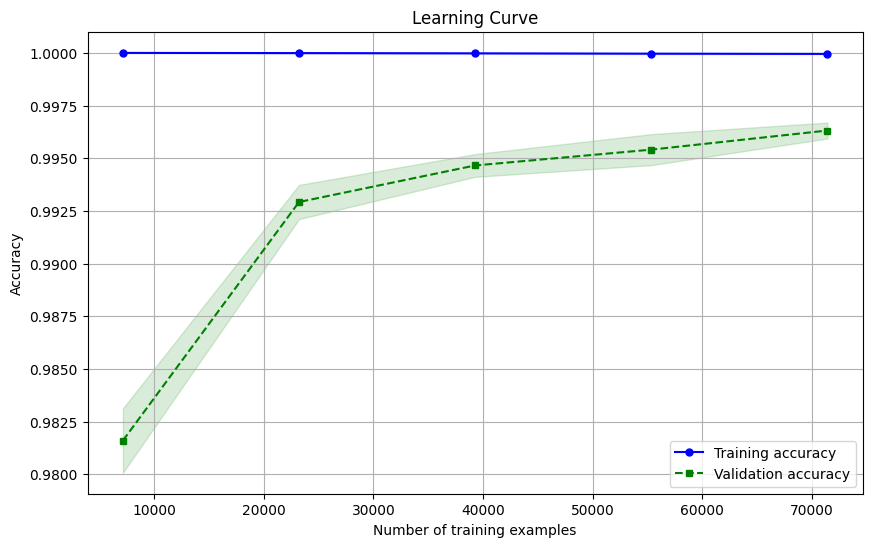

In [20]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

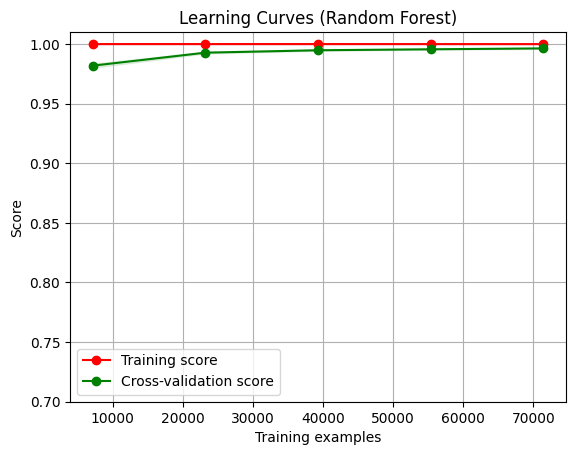

In [21]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

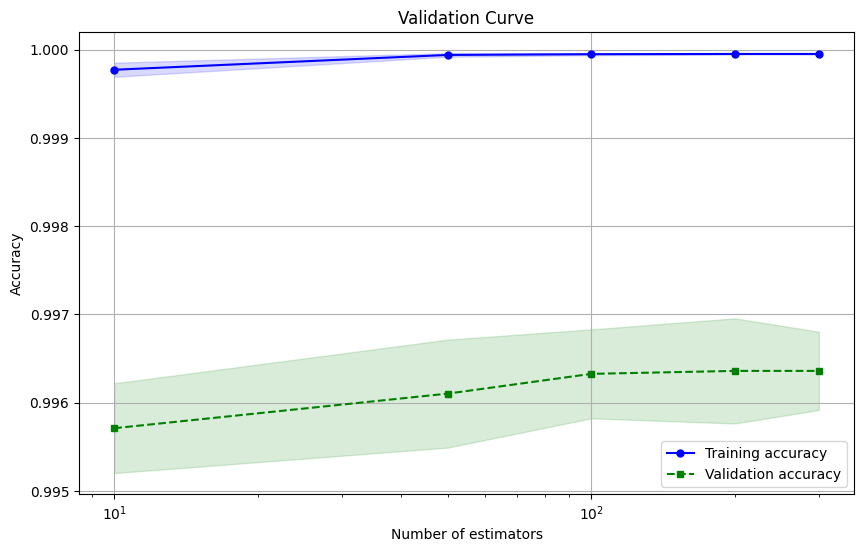

In [22]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

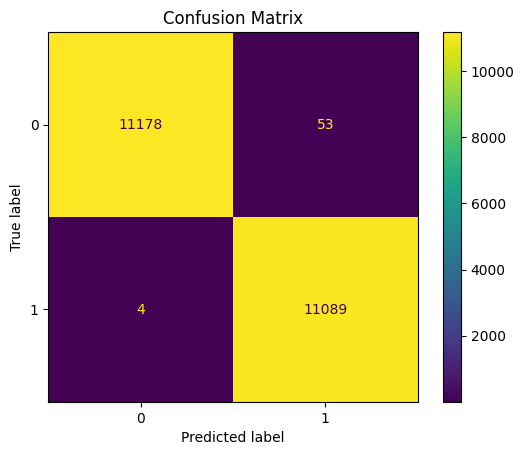

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

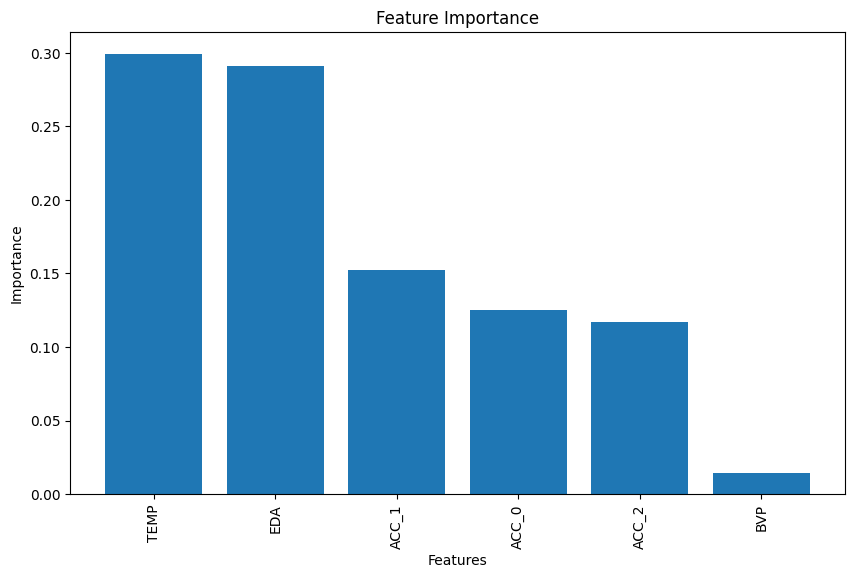

In [24]:
# Feature Importance Plot
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

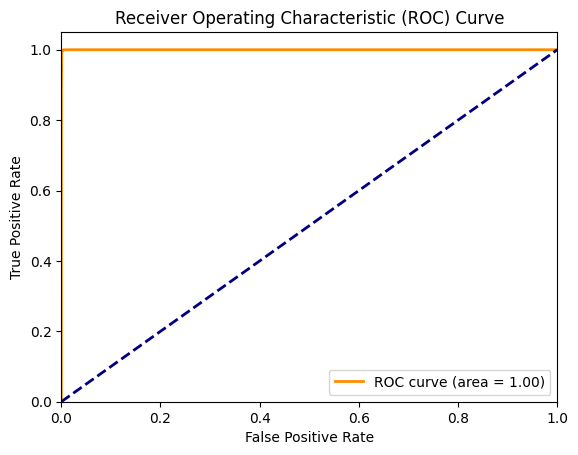

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

FINAL

In [26]:
import joblib
joblib.dump(best_model, 'Undersample_model_All.pkl')

['Undersample_model_All.pkl']

In [28]:
loaded_model = joblib.load('Undersample_model_All.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
22319,1.0
22320,0.0
22321,0.0
22322,1.0


In [29]:
y_test

89473     1.0
81547     1.0
32809     0.0
62073     1.0
99018     1.0
         ... 
69328     1.0
26827     0.0
32094     0.0
56255     1.0
101153    1.0
Name: labels, Length: 22324, dtype: float64

In [30]:
traget_df = y_test.reset_index(drop=True)

In [31]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
22319,1.0,1.0
22320,0.0,0.0
22321,0.0,0.0
22322,1.0,1.0


In [32]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 22267
Number of rows with different values: 57
